# Compare the results of WT and MT

This is based on the csv data generated from the `yeast_odecme_general_analysis.ipynb`

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

In [17]:
file_folder = "03032025rep20_q=1,fmut=0.06,initchange_6x801storder_final/"
# Read the two CSV files
df1 = pd.read_csv(os.path.join('./mt_wt_results/'+ file_folder + 'species_data_gal_cme_ode_gae_5.55_gia0_rep20_delta1_time420.lm.csv'))  # e.g., 'species_data_wt.csv'
df2 = pd.read_csv(os.path.join('./mt_wt_results/' + file_folder + 'species_data_gal_cme_ode_gae_nonregq=1,fmut=0.06,initialchange_6xG80&1storder_5.55_gia0_rep20_delta1_time420.lm.csv'))  # e.g., 'species_data_mt.csv'

# Plot settings
plt.style.use('default')
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['figure.dpi'] = 600
plt.rcParams['font.size'] = 18  # Increase base font size
plt.rcParams['axes.titlesize'] = 28  # Increase title font size
plt.rcParams['axes.labelsize'] = 18  # Increase axis label font size
plt.rcParams['xtick.labelsize'] = 18  # Increase tick label font size
plt.rcParams['ytick.labelsize'] = 18  # Increase tick label font size
plt.rcParams['legend.fontsize'] = 18  # Increase legend font size

def plot_species_comparison(species_name, df1, df2, label1='WT', label2='MT', save=True):
    """Plot comparison for a specific species from both datasets"""
    
    # Special handling for DG3 and DG80 related species
    if species_name in ['DG3', 'DG80']:
        # For mutant dataset, use the species_name as is
        species2_name = species_name
        # For wild type dataset, use the G4d version
        species1_name = f"{species_name}_G4d"
        
        # Get data for the species from both dataframes
        species1 = df1[df1['Species'] == species1_name].iloc[0]
        species2 = df2[df2['Species'] == species2_name].iloc[0]
        
        # Use the original species name for display
        display_name = species_name
    elif 'DG3' in species_name or 'DG80' in species_name:
        pass
    else:
        # Regular case - same species name in both datasets
        species1 = df1[df1['Species'] == species_name].iloc[0]
        species2 = df2[df2['Species'] == species_name].iloc[0]
        
        # Check if species_name is 'reporter' and replace with 'Grep' for display
        if species_name == 'reporter':
            display_name = 'Grep'
        elif species_name == 'reporter_rna':
            display_name = 'Rrep'
        else:
            display_name = species_name
    
    # Convert string arrays back to numerical arrays
    times1 = np.array([float(x)/60 for x in species1['Times'].split(',')])  # Convert to hours
    avg1 = np.array([float(x) for x in species1['Average'].split(',')])
    std1 = np.array([float(x) for x in species1['Std'].split(',')])
    
    times2 = np.array([float(x)/60 for x in species2['Times'].split(',')])  # Convert to hours
    avg2 = np.array([float(x) for x in species2['Average'].split(',')])
    std2 = np.array([float(x) for x in species2['Std'].split(',')])
    
    # Create the plot
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Plot first dataset with error bands (solid line)
    ax.plot(times1, avg1, label=f'{label1} {display_name}', linestyle='-')
    ax.fill_between(times1, avg1 - std1, avg1 + std1, alpha=0.2)
    
    # Plot second dataset with error bands (dashed line)
    ax.plot(times2, avg2, label=f'{label2} {display_name}', linestyle='--')
    ax.fill_between(times2, avg2 - std2, avg2 + std2, alpha=0.2)
    
    # Customize plot
    ax.set_xlabel('Time (hours)')
    ax.set_ylabel('Counts')
    ax.legend(framealpha=0.3)
    ax.grid(False)
    
    # Set integer ticks for x-axis
    max_hour = int(max(max(times1), max(times2)))
    ax.set_xticks(range(0, max_hour + 1))
    ax.set_ylim(bottom=0)
    
    # Save figure
    if save:
        output_dir = './mt_wt_results/' + file_folder
        if not os.path.exists(output_dir):
            os.makedirs(output_dir)
        
        # For DG3/DG80, use a special filename to indicate the comparison
        if species_name in ['DG3', 'DG80']:
            output_path = os.path.join(output_dir, f'{species_name}_vs_{species_name}_G4d_comparison.png')
        else:
            output_path = os.path.join(output_dir, f'{species_name}_comparison in CME-ODE.png')
            
        plt.savefig(output_path, dpi=600, bbox_inches='tight')
        plt.close()  # Close the figure to free memory
    else:
        plt.tight_layout()
        plt.show()
    
    return fig
# Example usage for a specific species
# species_to_plot = 'GAI'  # Replace with your species name
# plot_species_comparison(species_to_plot, df1, df2)

# # To plot all species in separate figures
# for species in df1['Species'].unique():
#     if species in df2['Species'].values:  # Only plot if species exists in both datasets
#         plot_species_comparison(species, df1, df2)

plot normalized Grep

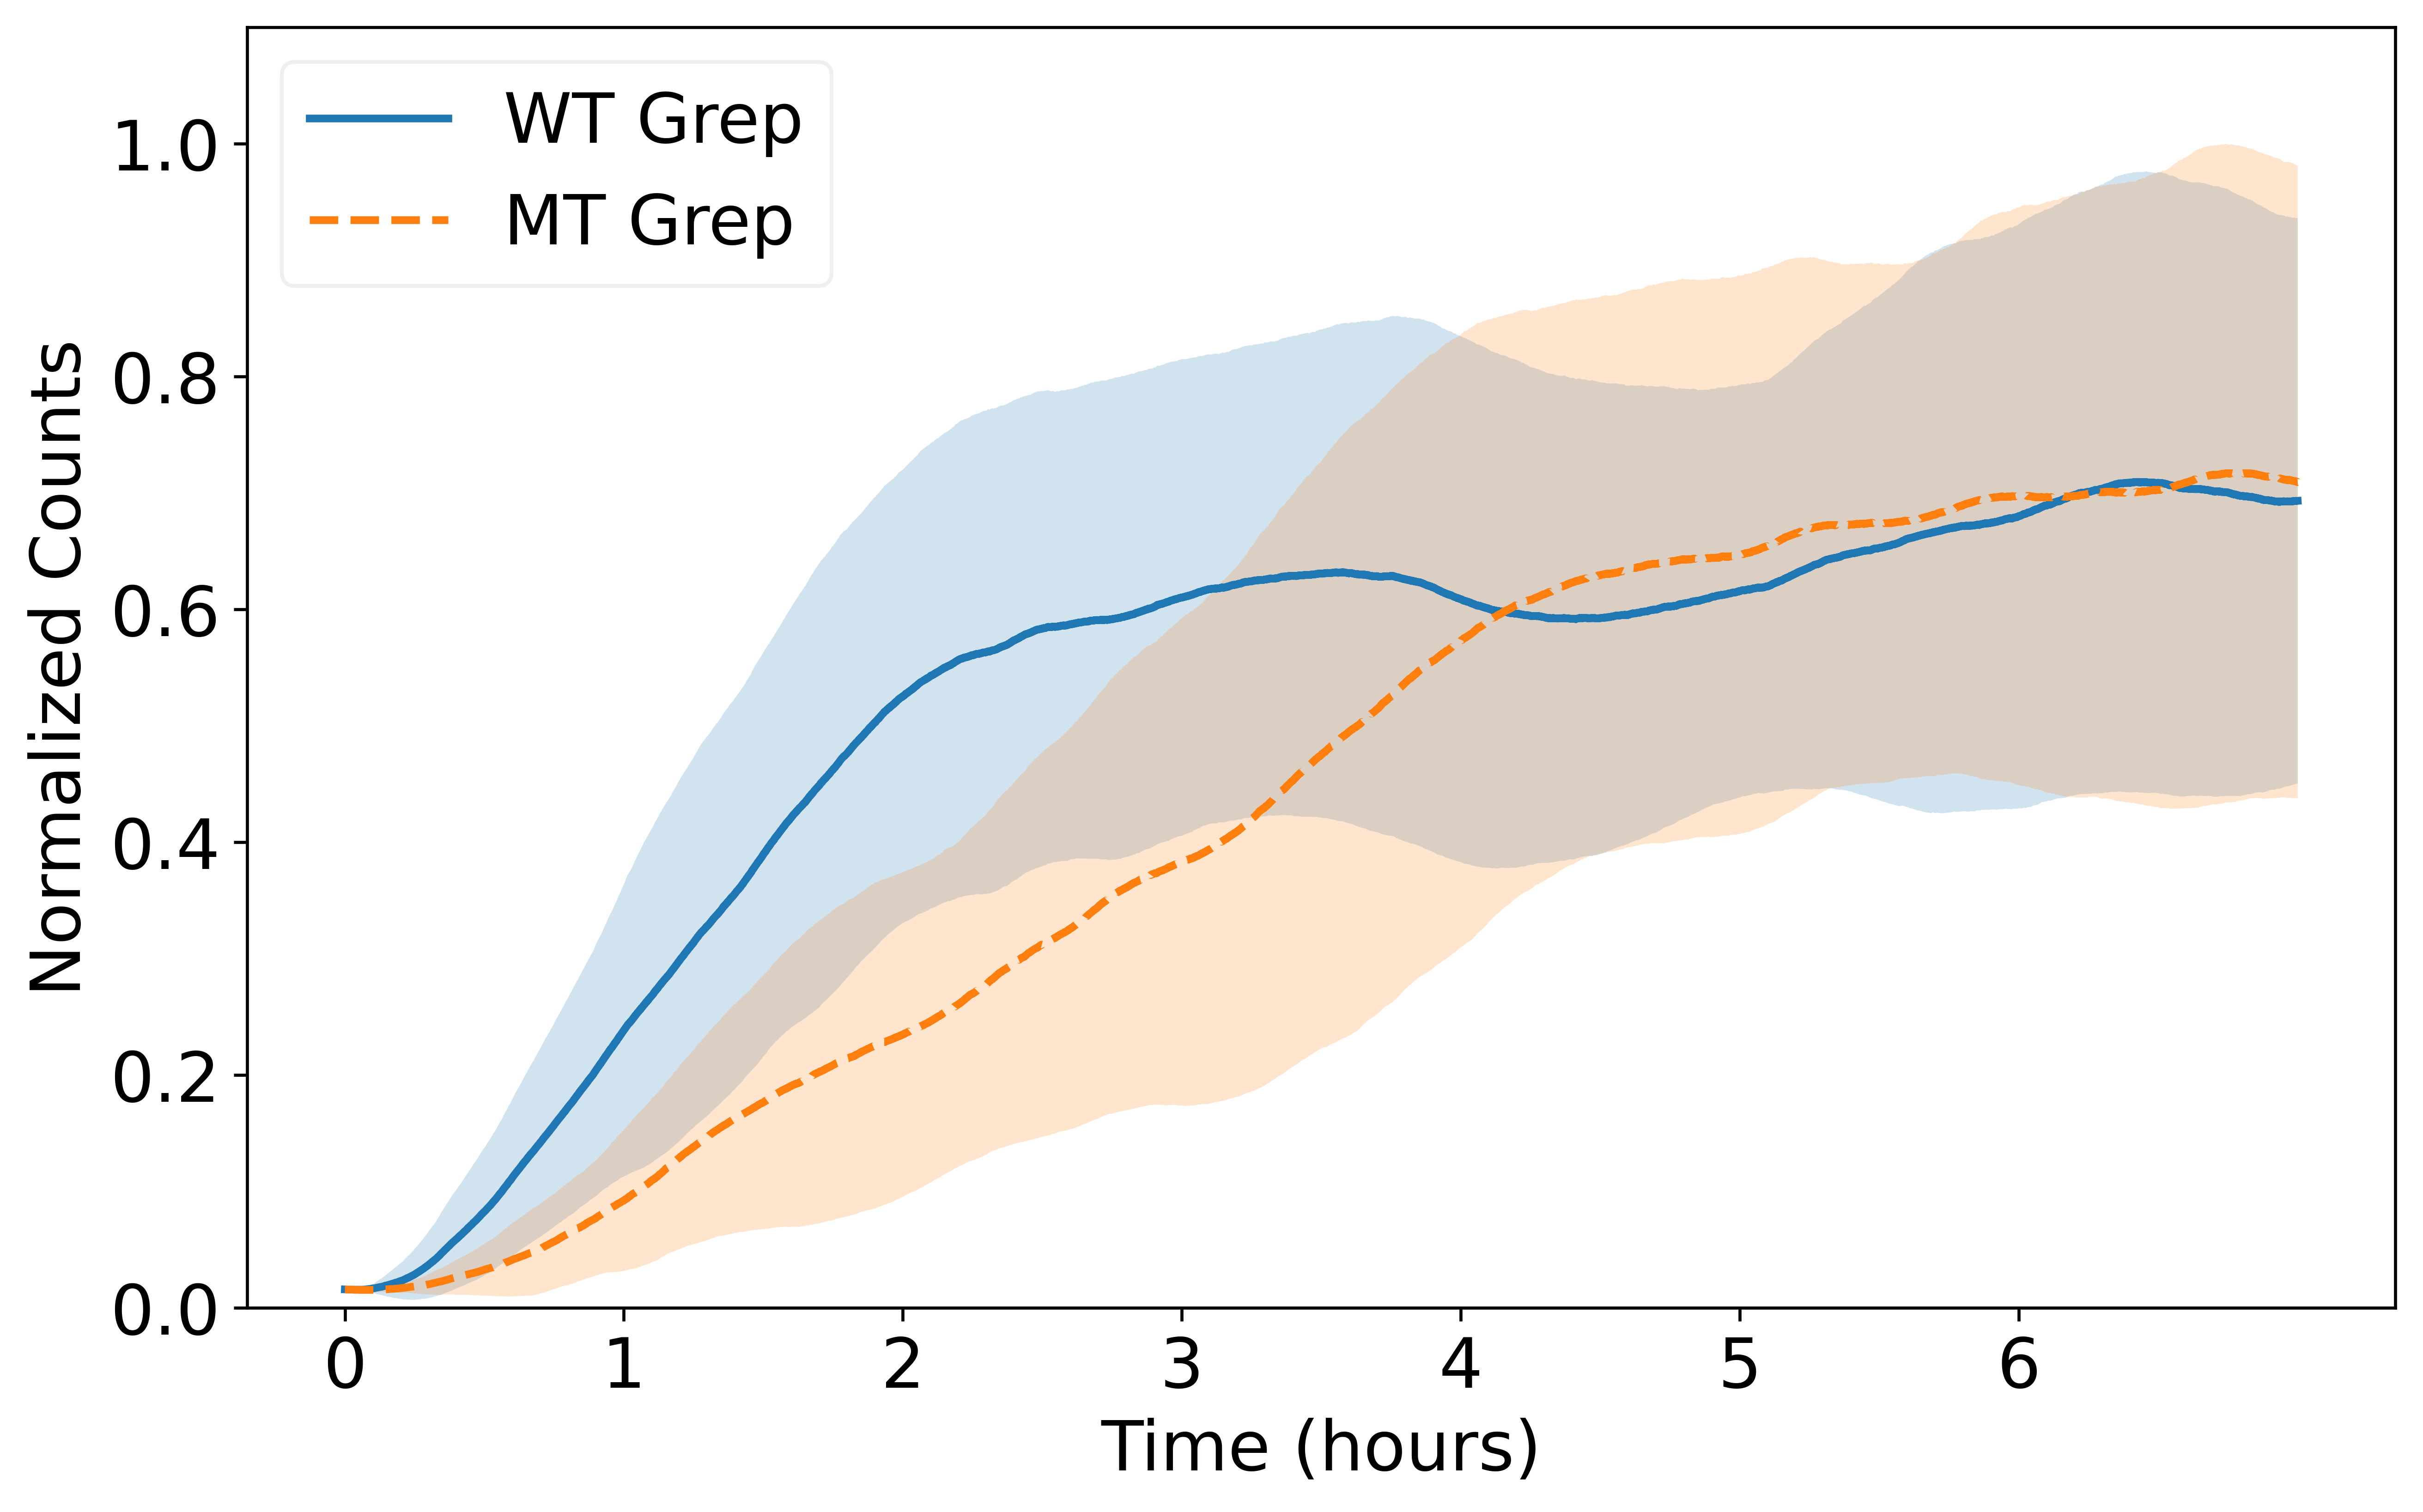

In [18]:
def plot_normalized_grep(df1, df2, label1='WT', label2='MT', save=True):
    """Plot comparison for reporter (Grep) with normalized y-axis (0-1)"""
    
    species_name = 'reporter'
    display_name = 'Grep'
    
    # Get data for the species from both dataframes
    species1 = df1[df1['Species'] == species_name].iloc[0]
    species2 = df2[df2['Species'] == species_name].iloc[0]
    
    # Convert string arrays back to numerical arrays
    times1 = np.array([float(x)/60 for x in species1['Times'].split(',')])  # Convert to hours
    avg1 = np.array([float(x) for x in species1['Average'].split(',')])
    std1 = np.array([float(x) for x in species1['Std'].split(',')])
    
    times2 = np.array([float(x)/60 for x in species2['Times'].split(',')])  # Convert to hours
    avg2 = np.array([float(x) for x in species2['Average'].split(',')])
    std2 = np.array([float(x) for x in species2['Std'].split(',')])
    
    # Find global max value across both datasets including standard deviations
    max_with_std1 = np.max(avg1 + std1)
    max_with_std2 = np.max(avg2 + std2)
    global_max = max(max_with_std1, max_with_std2)
    # Normalize both datasets using the global max
    norm_avg1 = avg1 / global_max
    norm_std1 = std1 / global_max
    
    norm_avg2 = avg2 / global_max
    norm_std2 = std2 / global_max
    
    # Create the plot
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Plot first dataset with error bands (solid line)
    ax.plot(times1, norm_avg1, label=f'{label1} {display_name}', linestyle='-', linewidth=2)
    ax.fill_between(times1, norm_avg1 - norm_std1, norm_avg1 + norm_std1, alpha=0.2)
    
    # Plot second dataset with error bands (dashed line)
    ax.plot(times2, norm_avg2, label=f'{label2} {display_name}', linestyle='--', linewidth=2)
    ax.fill_between(times2, norm_avg2 - norm_std2, norm_avg2 + norm_std2, alpha=0.2)
    
    # Customize plot
    ax.set_xlabel('Time (hours)')
    ax.set_ylabel('Normalized Counts')
    ax.legend(framealpha=0.3, loc='upper left')
    ax.grid(False)
    
    # Set integer ticks for x-axis
    max_hour = int(max(max(times1), max(times2)))
    ax.set_xticks(range(0, max_hour + 1))
    
    # Set y-axis limits to 0-1
    ax.set_ylim(0, 1.1)  # Slightly above 1 to show the full range
    
    # Save figure
    if save:
        output_dir = './mt_wt_results/' + file_folder
        if not os.path.exists(output_dir):
            os.makedirs(output_dir)
        output_path = os.path.join(output_dir, f'{species_name}_normalized_comparison_CME_ODE.png')
        plt.savefig(output_path, dpi=600, bbox_inches='tight')
        plt.close()  # Close the figure to free memory
    else:
        # plt.tight_layout()
        plt.show()
    
    return fig

# Example usage of the new function
plot_normalized_grep(df1, df2)
# ... existing code ...